# Dataframe Train

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib as plt
import matplotlib.pyplot as plt

## 1. Exploration

### 1.1. Extract dataset

In [2]:
train_data = pd.read_csv("../data/train.csv", encoding='cp1252')
# How the data looks
train_data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314


In [3]:
train_data.keys()

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

### 1.2. Examine nulls

In [4]:
train_data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
train_data.shape

(40455, 11)

As we can see, there are no null values.

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


### 1.3. Categorical values

#### 1.3.1. Cut

In [7]:
train_data.cut.unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [8]:
cut_map = {
    "Ideal": 5,
    "Premium": 4,
    "Very Good": 3,
    "Good": 2,
    "Fair": 1 
}

In [9]:
train_data["cut_score"] = train_data.cut.map(cut_map)
train_data

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_score
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754,4
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492,2
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010,4
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227,3
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314,3
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,Ideal,E,VS2,62.5,55.0,5.08,5.13,3.19,7.412,5
40451,40451,0.80,Ideal,H,VS2,62.1,54.0,5.96,5.99,3.71,8.016,5
40452,40452,1.53,Premium,G,SI2,58.7,59.0,7.51,7.45,4.39,9.070,4
40453,40453,1.51,Ideal,I,VS2,61.6,54.0,7.38,7.42,4.57,9.199,5


#### 1.3.2. Colour

In [10]:
train_data.color.unique()

array(['G', 'H', 'J', 'F', 'E', 'I', 'D'], dtype=object)

In [11]:
train_data = pd.get_dummies(train_data, columns=["color"], drop_first=True)

In [12]:
train_data.isnull().sum()

id           0
carat        0
cut          0
clarity      0
depth        0
table        0
x            0
y            0
z            0
price        0
cut_score    0
color_E      0
color_F      0
color_G      0
color_H      0
color_I      0
color_J      0
dtype: int64

In [13]:
train_data.head()

,id,carat,cut,clarity,depth,table,x,y,z,price,cut_score,color_E,color_F,color_G,color_H,color_I,color_J
0,0,1.01,Premium,VS1,62.7,58.0,6.36,6.31,3.97,8.754,4,0,0,1,0,0,0
1,1,0.60,Good,VS2,64.3,57.0,5.31,5.38,3.43,7.492,2,0,0,1,0,0,0
2,2,1.60,Premium,SI2,59.4,59.0,7.55,7.60,4.50,9.010,4,0,0,0,1,0,0
3,3,0.30,Very Good,VS1,63.5,58.0,4.27,4.24,2.70,6.227,3,0,0,0,0,0,1
4,4,1.00,Very Good,SI2,62.8,57.0,6.37,6.44,4.02,8.314,3,0,1,0,0,0,0


#### 1.3.3. Clarity

In [14]:
train_data.clarity.nunique()

8

In [15]:
train_data.clarity.unique()

array(['VS1', 'VS2', 'SI2', 'IF', 'SI1', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [18]:
train_data = pd.get_dummies(train_data, columns=["clarity"], drop_first=True)

In [20]:
train_data.head()

,id,carat,cut,depth,table,x,y,z,price,cut_score,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.01,Premium,62.7,58.0,6.36,6.31,3.97,8.754,4,...,0,0,0,0,0,0,1,0,0,0
1,1,0.60,Good,64.3,57.0,5.31,5.38,3.43,7.492,2,...,0,0,0,0,0,0,0,1,0,0
2,2,1.60,Premium,59.4,59.0,7.55,7.60,4.50,9.010,4,...,1,0,0,0,0,1,0,0,0,0
3,3,0.30,Very Good,63.5,58.0,4.27,4.24,2.70,6.227,3,...,0,0,1,0,0,0,1,0,0,0
4,4,1.00,Very Good,62.8,57.0,6.37,6.44,4.02,8.314,3,...,0,0,0,0,0,1,0,0,0,0


- The column cut will not be helpful for our analysis since its not numerical, therefore, we remove it.

In [21]:
train_data_1 = train_data.drop("cut", axis=1)
train_data_1

,id,carat,depth,table,x,y,z,price,cut_score,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0,1.01,62.7,58.0,6.36,6.31,3.97,8.754,4,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0.60,64.3,57.0,5.31,5.38,3.43,7.492,2,0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.60,59.4,59.0,7.55,7.60,4.50,9.010,4,0,...,1,0,0,0,0,1,0,0,0,0
3,3,0.30,63.5,58.0,4.27,4.24,2.70,6.227,3,0,...,0,0,1,0,0,0,1,0,0,0
4,4,1.00,62.8,57.0,6.37,6.44,4.02,8.314,3,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.51,62.5,55.0,5.08,5.13,3.19,7.412,5,1,...,0,0,0,0,0,0,0,1,0,0
40451,40451,0.80,62.1,54.0,5.96,5.99,3.71,8.016,5,0,...,1,0,0,0,0,0,0,1,0,0
40452,40452,1.53,58.7,59.0,7.51,7.45,4.39,9.070,4,0,...,0,0,0,0,0,1,0,0,0,0
40453,40453,1.51,61.6,54.0,7.38,7.42,4.57,9.199,5,0,...,0,1,0,0,0,0,0,1,0,0


In [22]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            40455 non-null  int64  
 1   carat         40455 non-null  float64
 2   depth         40455 non-null  float64
 3   table         40455 non-null  float64
 4   x             40455 non-null  float64
 5   y             40455 non-null  float64
 6   z             40455 non-null  float64
 7   price         40455 non-null  float64
 8   cut_score     40455 non-null  int64  
 9   color_E       40455 non-null  uint8  
 10  color_F       40455 non-null  uint8  
 11  color_G       40455 non-null  uint8  
 12  color_H       40455 non-null  uint8  
 13  color_I       40455 non-null  uint8  
 14  color_J       40455 non-null  uint8  
 15  clarity_IF    40455 non-null  uint8  
 16  clarity_SI1   40455 non-null  uint8  
 17  clarity_SI2   40455 non-null  uint8  
 18  clarity_VS1   40455 non-nu

In [23]:
train_data_1.to_csv("../data/train_data.csv")

## 2. Correlation

<AxesSubplot:>

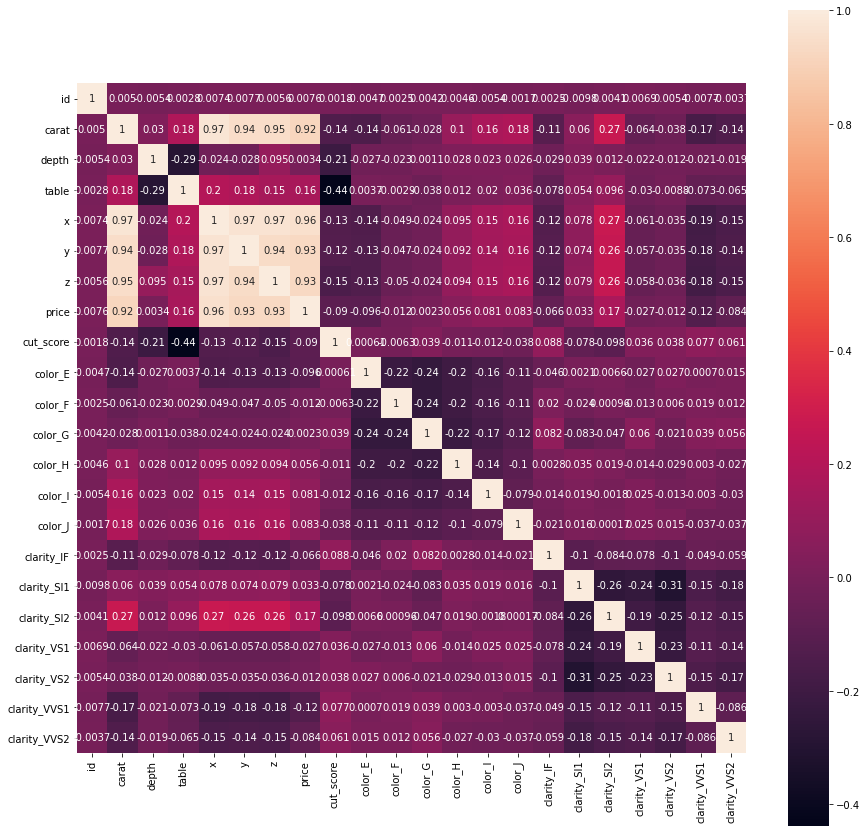

In [31]:
fig, ax = plt.subplots(figsize=(15,15))
corr = train_data_1.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

In [25]:
corr

,id,carat,depth,table,x,y,z,price,cut_score,color_E,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,1.000000,0.005008,-0.005396,0.002846,0.007422,0.007702,0.005633,0.007602,0.001836,-0.004699,...,0.004572,-0.005389,-0.001728,0.002541,-0.009776,0.004061,0.006868,0.005395,-0.007680,-0.003689
carat,0.005008,1.000000,0.029747,0.182453,0.974714,0.944353,0.948460,0.920292,-0.136512,-0.140564,...,0.102003,0.164692,0.180159,-0.111862,0.060101,0.269549,-0.064388,-0.038162,-0.167058,-0.139126
depth,-0.005396,0.029747,1.000000,-0.291668,-0.023705,-0.028183,0.095489,0.003437,-0.211912,-0.026689,...,0.027769,0.022596,0.026050,-0.029382,0.038611,0.011683,-0.022281,-0.012335,-0.021312,-0.018706
table,0.002846,0.182453,-0.291668,1.000000,0.197420,0.184191,0.152496,0.159969,-0.438306,0.003658,...,0.011619,0.020297,0.036409,-0.077692,0.054421,0.095883,-0.029512,-0.008759,-0.072535,-0.064686
x,0.007422,0.974714,-0.023705,0.197420,1.000000,0.967309,0.966396,0.957815,-0.128336,-0.135231,...,0.094895,0.149698,0.164394,-0.123149,0.077605,0.272219,-0.060887,-0.035018,-0.185200,-0.149462
y,0.007702,0.944353,-0.028183,0.184191,0.967309,1.000000,0.941970,0.928896,-0.123047,-0.130010,...,0.092417,0.144631,0.159211,-0.117270,0.073760,0.262999,-0.056805,-0.035322,-0.177832,-0.143166
z,0.005633,0.948460,0.095489,0.152496,0.966396,0.941970,1.000000,0.930774,-0.150653,-0.131824,...,0.093600,0.147592,0.163543,-0.121806,0.078904,0.263764,-0.058486,-0.036332,-0.181344,-0.146460
price,0.007602,0.920292,0.003437,0.159969,0.957815,0.928896,0.930774,1.000000,-0.090436,-0.096363,...,0.055548,0.080514,0.082733,-0.066253,0.032547,0.172378,-0.027405,-0.011668,-0.123940,-0.084316
cut_score,0.001836,-0.136512,-0.211912,-0.438306,-0.128336,-0.123047,-0.150653,-0.090436,1.000000,0.000607,...,-0.010869,-0.012075,-0.037772,0.087790,-0.077887,-0.097603,0.035569,0.037921,0.076660,0.061231
color_E,-0.004699,-0.140564,-0.026689,0.003658,-0.135231,-0.130010,-0.131824,-0.096363,0.000607,1.000000,...,-0.199780,-0.158410,-0.110612,-0.046167,0.002115,0.006552,-0.027386,0.027476,0.000701,0.014640


In [28]:
results = smf.ols('price ~ carat + depth + x + y + z + table + cut_score + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2 + color_E + color_F + color_G + color_H + color_H + color_I + color_J', data=train_data_1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 6.211e+04
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        16:22:49   Log-Likelihood:                 11858.
No. Observations:               40455   AIC:                        -2.367e+04
Df Residuals:                   40434   BIC:                        -2.349e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.7607      0.073    -38.020      0.000      -2.903      -2.618
carat           -0.5627      0.009    -63.460      0.000      -0.580      -0.545
depth            0.0501      0.001     62.445      0.000       0.048       0.052
x                1.1496      0.006    204.084      0.000       1.139       1.161
y                0.0311      0.003     10.041      0.000       0.025       0.037
z                0.0327      0.006      5.849      0.000       0.022       0.044
table            0.0067      0.001     13.216      0.000       0.006       0.008
cut_score        0.0211      0.001     21.516      0.000       0.019       0.023
clarity_IF       1.1073      0.009    118.771      0.000       1.089       1.126
clarity_SI1      0.6203      0.008     78.339      0.000       0.605       0.636
clarity_SI2      0.4522      0.008     56.799      0.000       0.437       0.468
clarity_VS1      0.8276      0.008    102.275      0.000       0.812       0.843
clarity_VS2      0.7615      0.008     95.635      0.000       0.746       0.777
clarity_VVS1     1.0149      0.009    118.189      0.000       0.998       1.032
clarity_VVS2     0.9489      0.008    113.850      0.000       0.933       0.965
color_E         -0.0553      0.003    -16.673      0.000      -0.062      -0.049
color_F         -0.0894      0.003    -26.701      0.000      -0.096      -0.083
color_G         -0.1577      0.003    -48.019      0.000      -0.164      -0.151
color_H         -0.2567      0.003    -73.539      0.000      -0.264      -0.250
color_I         -0.3850      0.004    -98.673      0.000      -0.393      -0.377
color_J         -0.5218      0.005   -108.376      0.000      -0.531      -0.512
==============================================================================
Omnibus:                    82083.115   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1002387831.721
Skew:                          16.291   Prob(JB):                         0.00
Kurtosis:                     773.459   Cond. No.                     6.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
results = smf.ols('price ~ clarity_VS1 + clarity_VS2 + clarity_VVS2+ clarity_VVS1+ clarity_IF + clarity_SI2 + table + x', data=train_data_1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 7.845e+04
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        16:23:20   Log-Likelihood:                -1343.4
No. Observations:               40455   AIC:                             2705.
Df Residuals:                   40446   BIC:                             2782.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.8145      0.033     85.800      0.000       2.750       2.879
clarity_VS1      0.1980      0.004     48.856      0.000       0.190       0.206
clarity_VS2      0.1609      0.004     44.638      0.000       0.154       0.168
clarity_VVS2     0.3272      0.005     67.770      0.000       0.318       0.337
clarity_VVS1     0.3573      0.006     64.600      0.000       0.346       0.368
clarity_IF       0.4360      0.007     58.942      0.000       0.421       0.450
clarity_SI2     -0.1156      0.004    -29.416      0.000      -0.123      -0.108
table           -0.0073      0.001    -12.794      0.000      -0.008      -0.006
x                0.9205      0.001    763.136      0.000       0.918       0.923
==============================================================================
Omnibus:                    29298.135   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10491952.666
Skew:                           2.362   Prob(JB):                         0.00
Kurtosis:                      81.753   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- As we can see, the clarity of the diamond is strongly correlated with the price as well as the lenght (X).

<AxesSubplot:>

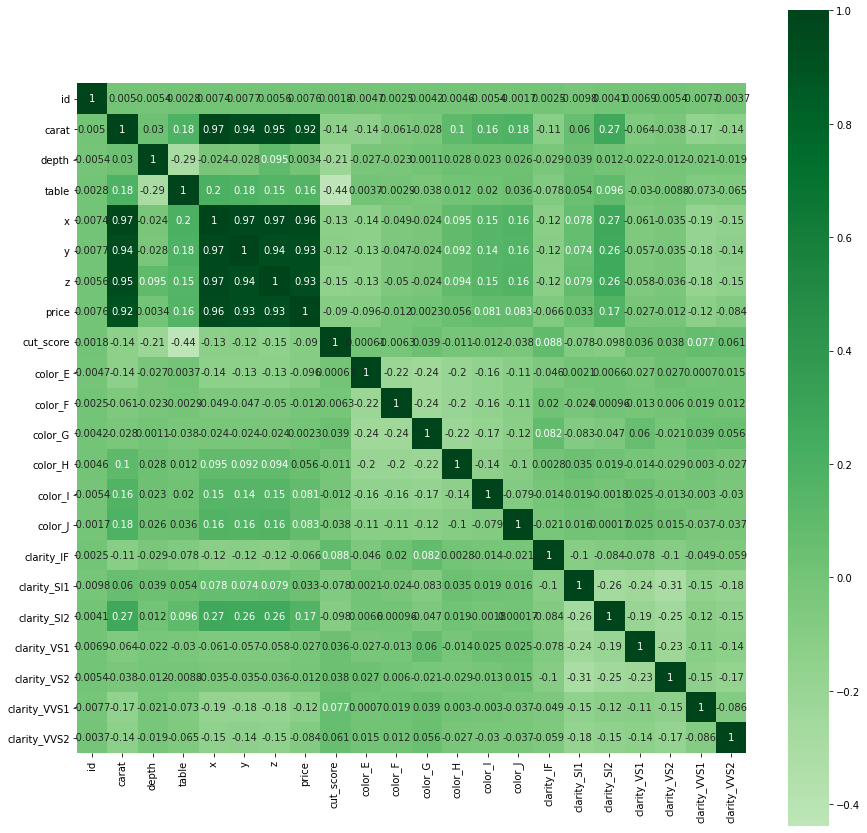

In [35]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data=corr, square=True , annot=True, cbar=True, center=0, cmap='Greens')

- In the previous visualization we can clearly see there is certain colineality between price and x, y, z and carat.
- Moreover, the rest of the variables have correlaion between price and we will try to make a model with them, having an Adjusted R-Squared of 95.5%.

In [39]:
results = smf.ols('price ~ x + y + z + carat + depth + table + clarity_VS1 +clarity_VS2+ clarity_SI1 + clarity_SI2 + color_F + color_G + color_H + color_H + color_I + color_J', data=train_data_1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 5.743e+04
Date:                Fri, 07 May 2021   Prob (F-statistic):               0.00
Time:                        16:41:01   Log-Likelihood:                 4731.8
No. Observations:               40455   AIC:                            -9432.
Df Residuals:                   40439   BIC:                            -9294.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.1820      0.074     -2.470      0.014      -0.326      -0.038
x               1.1292      0.007    168.247      0.000       1.116       1.142
y               0.0356      0.004      9.649      0.000       0.028       0.043
z               0.0386      0.007      5.796      0.000       0.026       0.052
carat          -0.5852      0.011    -55.389      0.000      -0.606      -0.564
depth           0.0348      0.001     38.912      0.000       0.033       0.037
table          -0.0036      0.001     -7.056      0.000      -0.005      -0.003
clarity_VS1    -0.0963      0.004    -26.416      0.000      -0.103      -0.089
clarity_VS2    -0.1562      0.003    -47.118      0.000      -0.163      -0.150
clarity_SI1    -0.2917      0.003    -87.068      0.000      -0.298      -0.285
clarity_SI2    -0.4490      0.004   -119.342      0.000      -0.456      -0.442
color_F        -0.0497      0.003    -15.475      0.000      -0.056      -0.043
color_G        -0.1063      0.003    -34.287      0.000      -0.112      -0.100
color_H        -0.2129      0.003    -62.201      0.000      -0.220      -0.206
color_I        -0.3344      0.004    -83.636      0.000      -0.342      -0.327
color_J        -0.4746      0.005    -90.794      0.000      -0.485      -0.464
==============================================================================
Omnibus:                    60430.539   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        243382605.845
Skew:                           8.335   Prob(JB):                         0.00
Kurtosis:                     382.617   Cond. No.                     5.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""